# Report on Analysis of BMW Used Car Listings

**1. Introduction:**
This report analyzes a dataset containing information about used BMW car listings. The dataset includes details such as model, year, price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size. The objective of this analysis is to gain insights into the factors influencing the pricing of used BMW cars and to identify any patterns or trends within the data.

**2. Data Overview:**
The dataset consists of 10,781 records and 9 columns. The columns include both numerical and categorical data:
- Numerical columns: year, price, mileage, tax, mpg, engineSize.
- Categorical columns: model, transmission, fuelType.

**3. Data Visualizations:**
To understand the data better, several visualizations were created:
1. Distribution of Car Prices: A histogram showing the distribution of car prices, indicating the range and frequency of prices.
2. Car Prices by Fuel Type: A box plot illustrating the variation in car prices across different fuel types.
3. Count of Cars by Transmission Type: A bar chart showing the number of cars based on transmission type.
4. Mileage vs. Price: A scatter plot depicting the relationship between mileage and price.
5. Pairplot of Numerical Variables: A matrix of scatter plots showing pairwise relationships between numerical variables.
6. Distribution of Engine Sizes: A histogram displaying the distribution of engine sizes.
7. Correlation Matrix: A heatmap illustrating the correlation between numerical variables, helping identify any significant relationships.
8. Count of Cars by Year: A bar chart indicating the number of cars listed by year.
9. Average Mileage by Fuel Type: A bar plot showing the average mileage for different fuel types.
10. Car Prices by Year: A box plot demonstrating how car prices vary across different years of registration.

**4. Insights:**
- Car prices vary significantly, with most listings falling within a certain price range.
- Fuel type appears to influence car prices, with diesel cars generally priced higher than petrol or hybrid cars.
- Automatic transmission seems to be more prevalent among the listed cars compared to manual transmission.
- There is a negative correlation between mileage and price, indicating that cars with lower mileage tend to be priced higher.
- The engine size distribution suggests that the majority of listed cars have engine sizes between 1.5 to 3.0 litres.
- Year of registration also affects car prices, with newer cars generally commanding higher prices.
- There is a slight positive correlation between engine size and price, suggesting that larger engines may contribute to higher prices.

**5. Recommendations:**
- Sellers should consider factors such as mileage, fuel type, transmission type, and year of registration when pricing their cars.
- Buyers should take into account these factors as well as their preferences and requirements when searching for a used BMW car.
- Additional features such as car color, service history, and number of previous owners could provide further insights into pricing and could be considered for future data collection.

**6. Conclusion:**
In conclusion, this analysis provides valuable insights into the factors influencing the pricing of used BMW cars. By understanding these factors, both sellers and buyers can make informed decisions, leading to more satisfactory transactions. Further analysis could be conducted with additional features and a larger dataset to enhance the accuracy and applicability of the findings.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv("/kaggle/input/bmw-used-car-listing/bmw.csv")

In [13]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [29]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0
10780,X1,2017,15981,Automatic,59432,Diesel,125,57.6,2.0


In [27]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


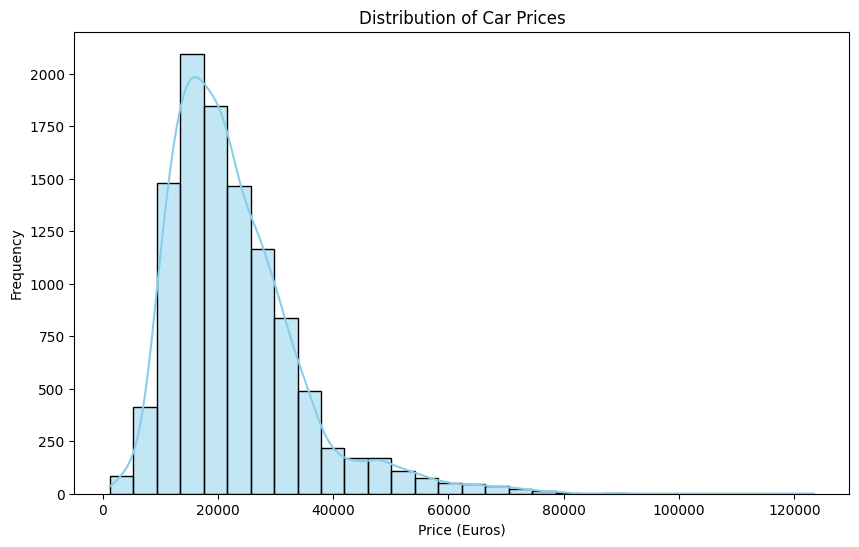

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

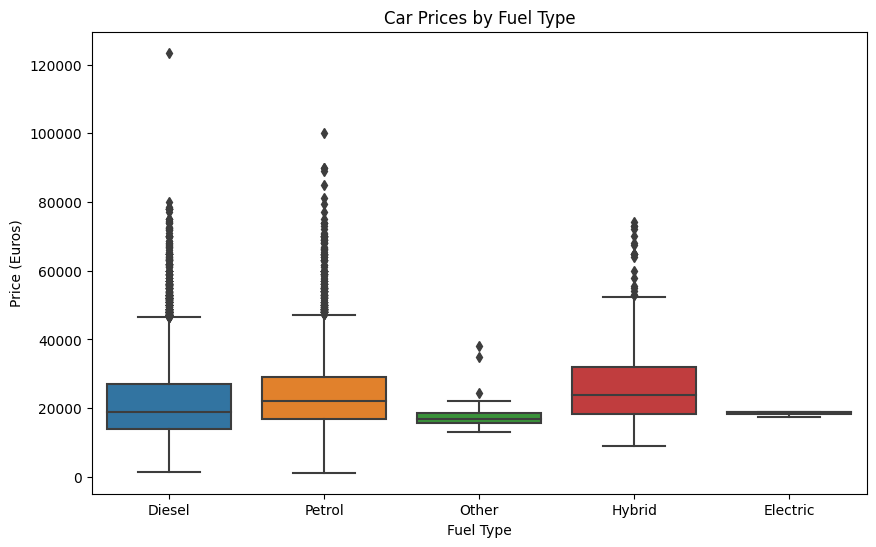

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='fuelType', y='price', data=data)
plt.title('Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (Euros)')
plt.show()

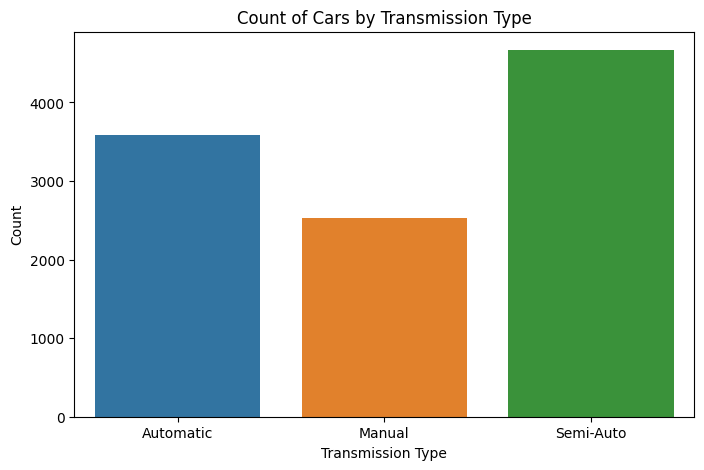

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='transmission')
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

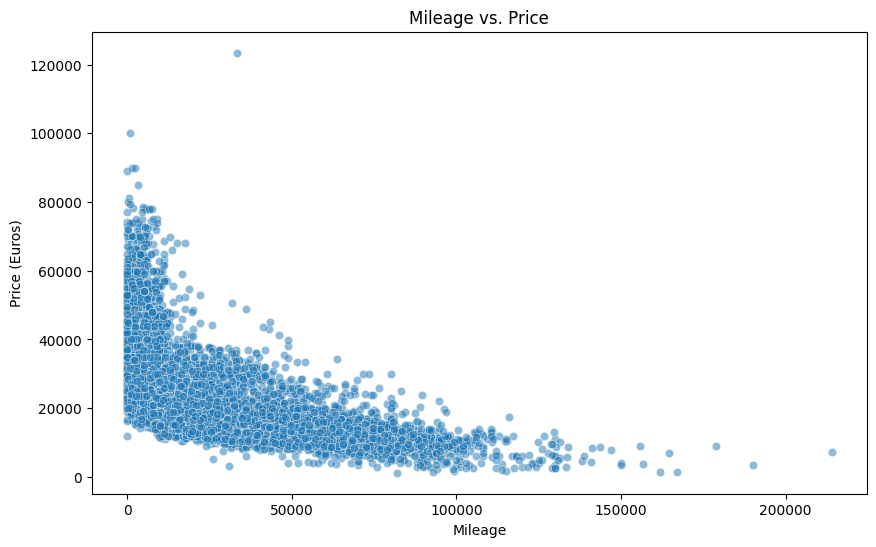

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='mileage', y='price', data=data, alpha=0.5)
plt.title('Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price (Euros)')
plt.show()

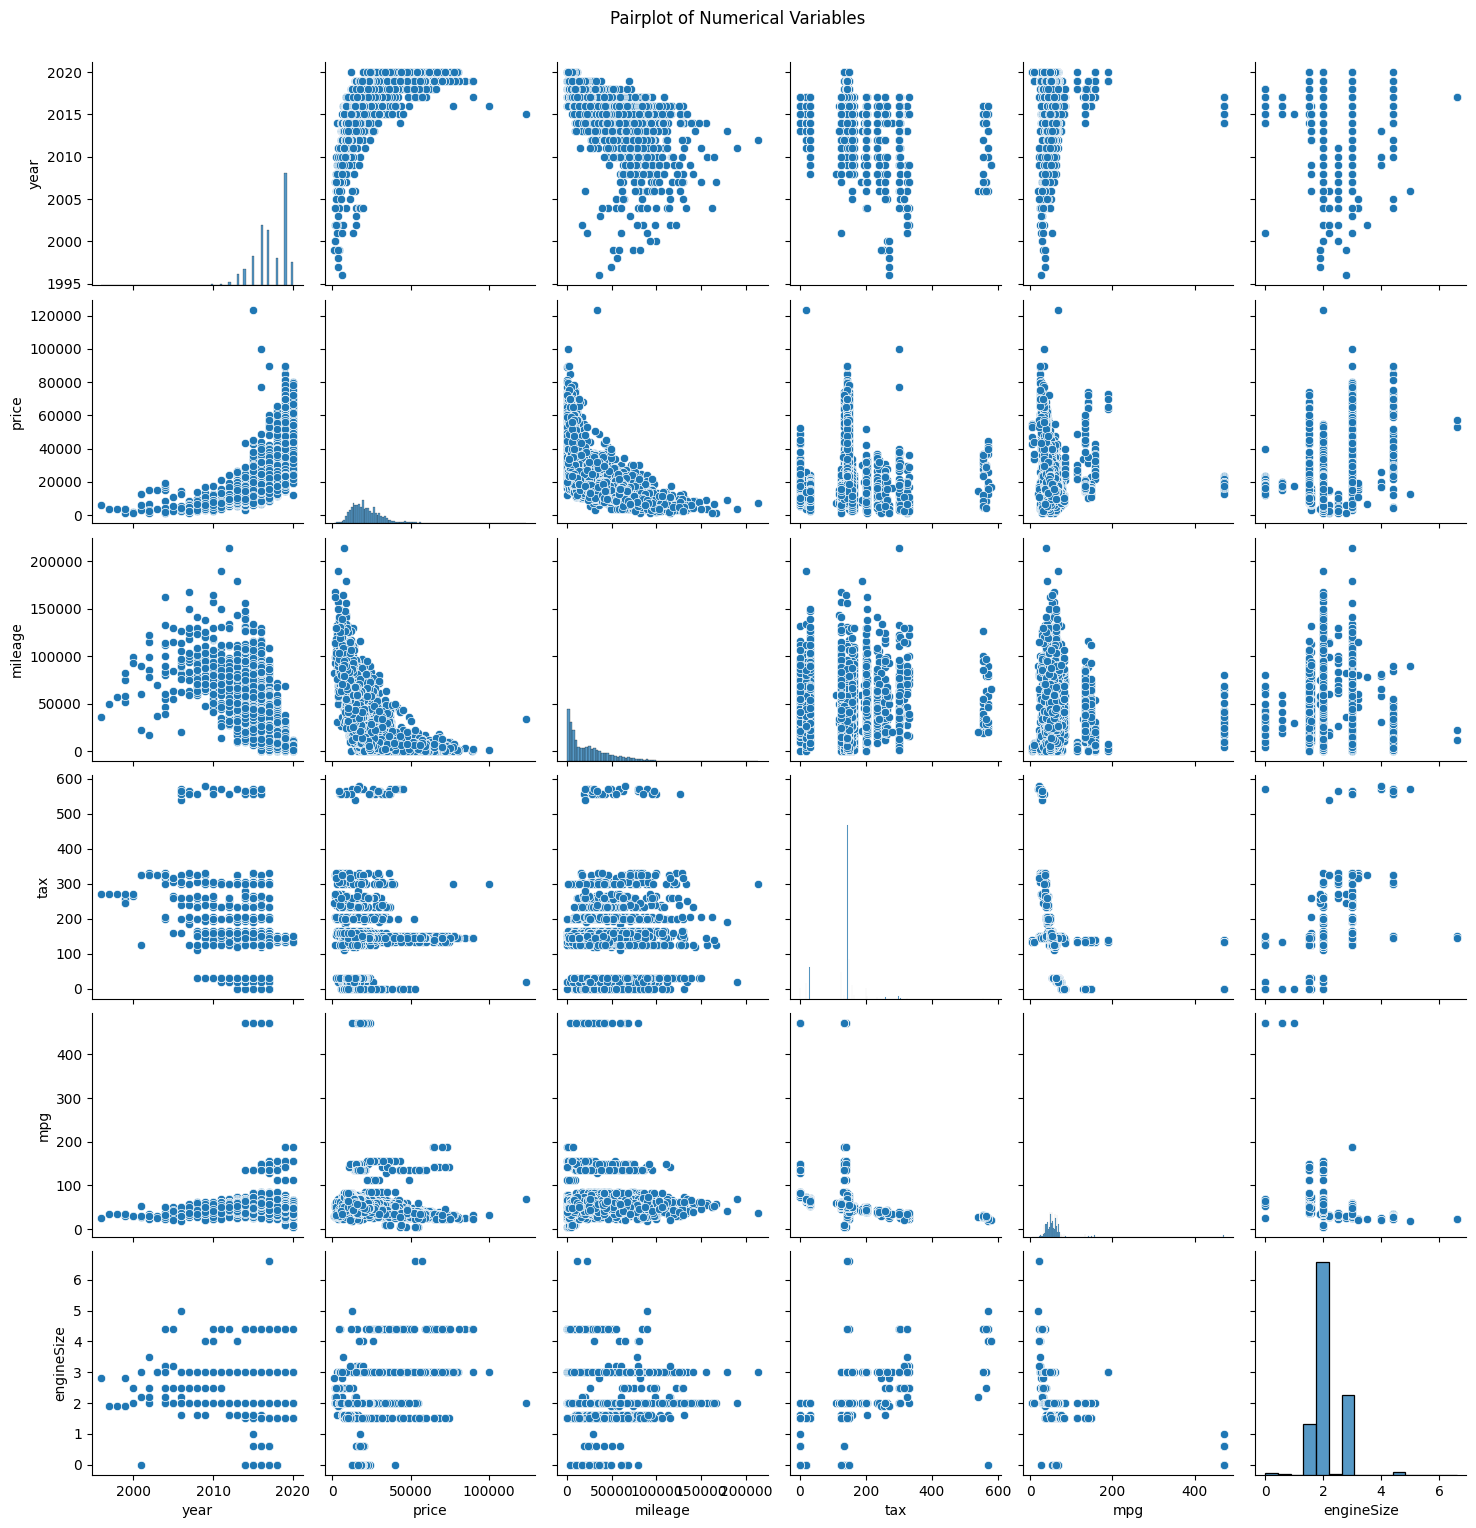

In [21]:
sns.pairplot(data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

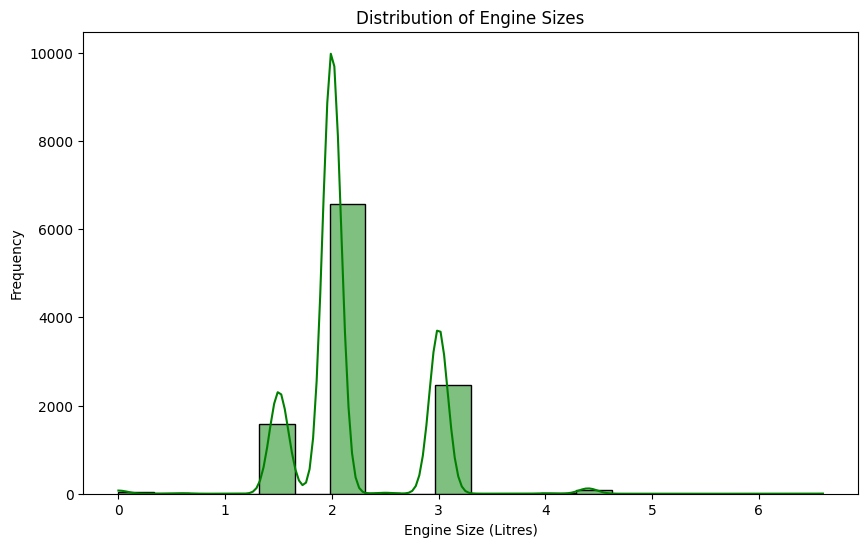

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(data['engineSize'], kde=True, bins=20, color='green')
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size (Litres)')
plt.ylabel('Frequency')
plt.show()

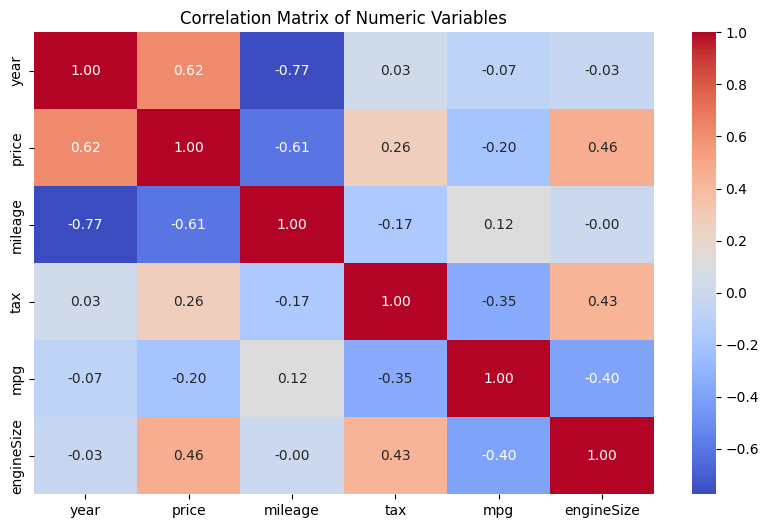

In [41]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

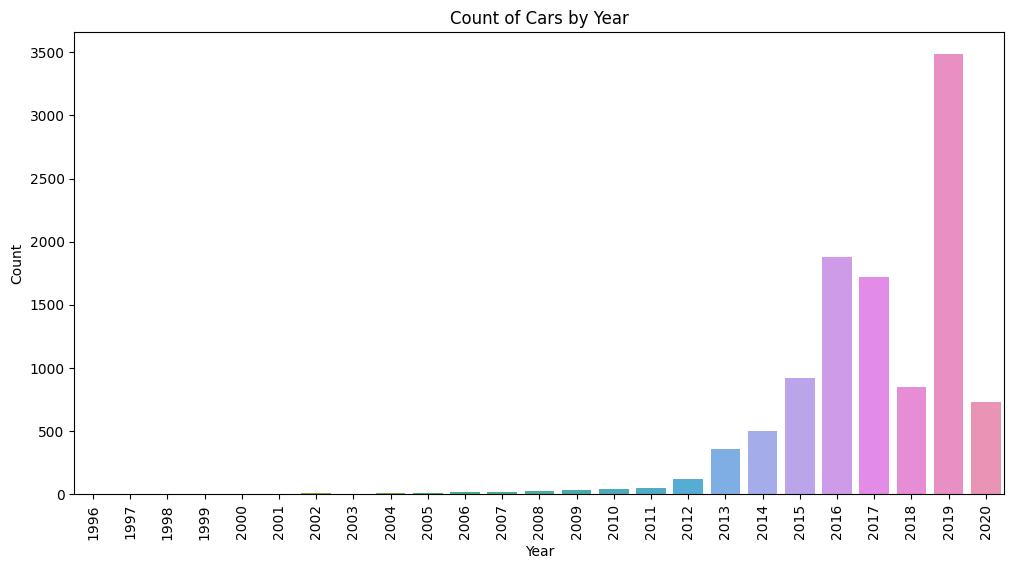

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='year')
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

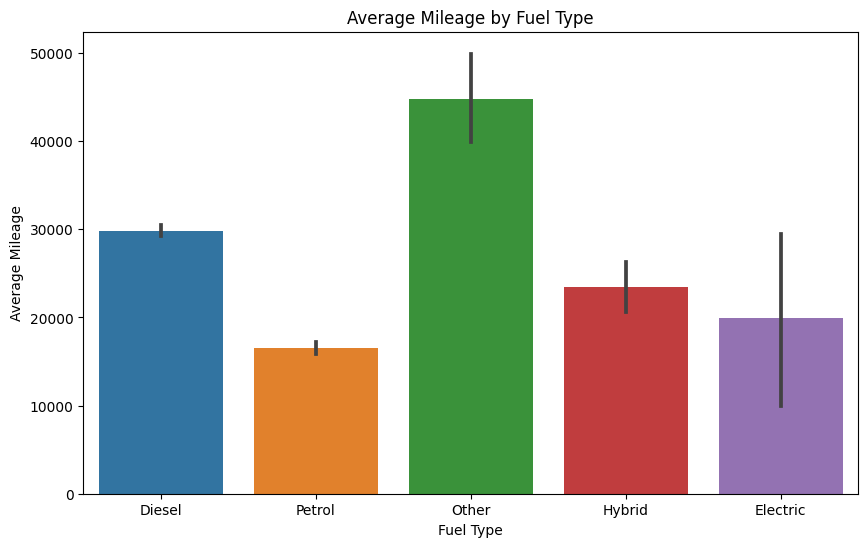

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='fuelType', y='mileage', data=data, estimator=lambda x: sum(x)/len(x))
plt.title('Average Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.show()

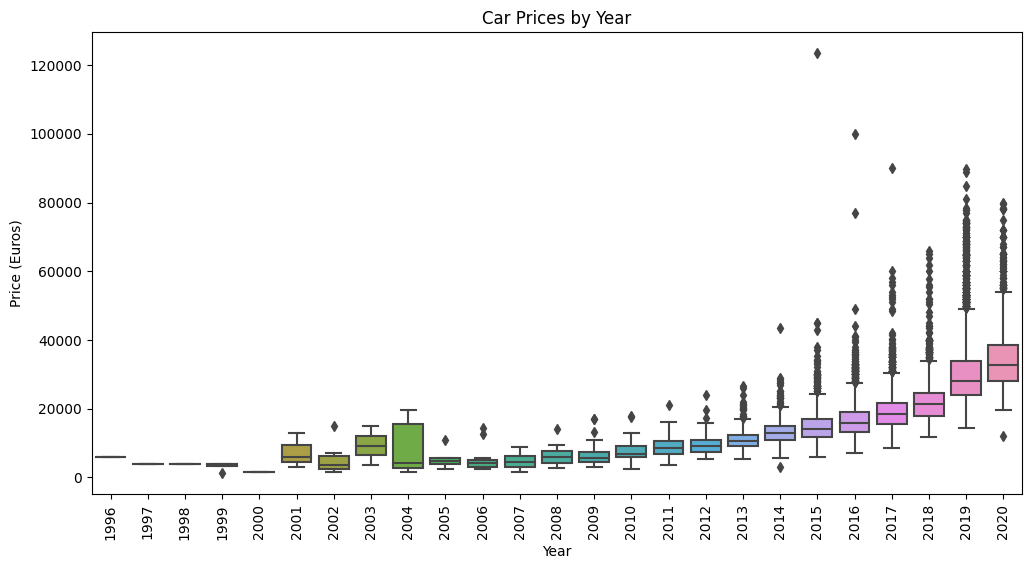

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='year', y='price', data=data)
plt.title('Car Prices by Year')
plt.xlabel('Year')
plt.ylabel('Price (Euros)')
plt.xticks(rotation=90)
plt.show()